### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
data = pd.read_csv('data/coupons.csv')

In [7]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

--- MISSING DATA SUMMARY ---
destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


<Axes: title={'center': 'Columns vs Count of missing values'}, xlabel='Column', ylabel='Null Value Count'>

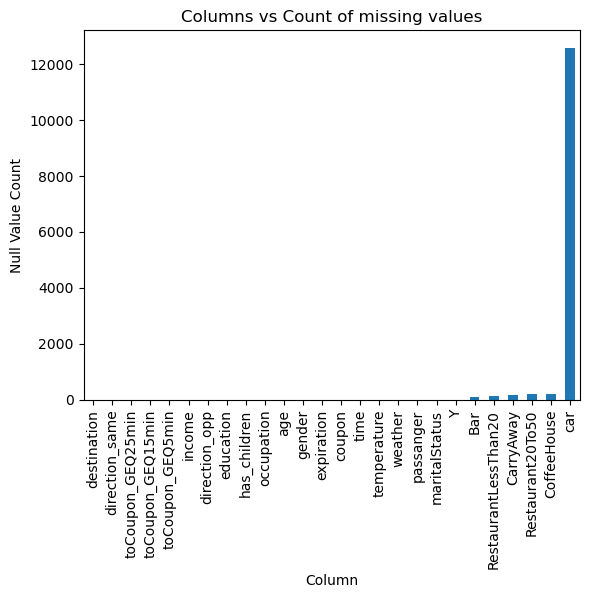

In [9]:
# print('--- INFO ---')
# print(data.info())

print('--- MISSING DATA SUMMARY ---')
missing_data_summary = data.isna().sum()
print(missing_data_summary)
missing_data_summary.sort_values().plot(kind='bar', xlabel = 'Column', ylabel = 'Null Value Count', title='Columns vs Count of missing values')
# sns.barplot(data=missing_data_summary.sort_values())

3. Decide what to do about your missing data -- drop, replace, other...

In [11]:
# "car" column has most NaN - 12576 out of 12684 records
# print(data['car'].value_counts())
missing_car_values = data['car'].isna().sum()/data.shape[0]
missing_car_values

0.9914853358561968

OBSERVATION: More than 99% of values in car column are null values.

In [13]:
# Since more than 99% of values in car column are null values. Hence drop the Car column
data.drop('car', axis=1, inplace=True)

<Axes: title={'center': 'Columns vs Count of missing values'}, xlabel='Column', ylabel='Null Value Count'>

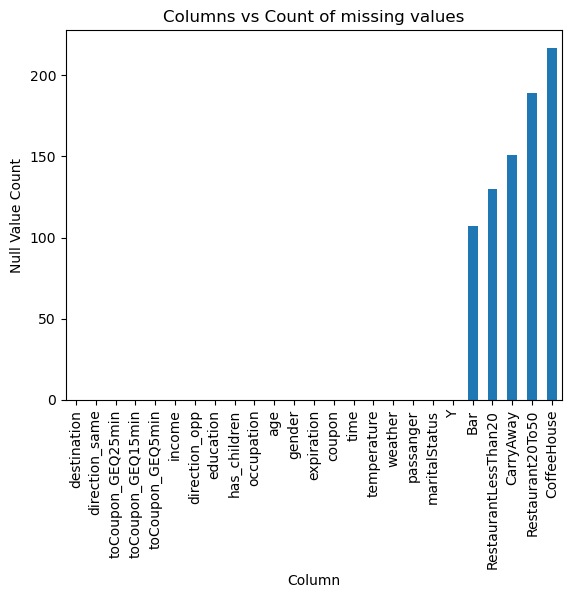

In [14]:
# visualize the data for null values after dropping the 'car' column
missing_data_summary = data.isna().sum()
missing_data_summary
missing_data_summary.sort_values().plot(
    kind='bar',
    xlabel = 'Column',
    ylabel = 'Null Value Count',
    title='Columns vs Count of missing values')

destination             0.000000
passanger               0.000000
weather                 0.000000
temperature             0.000000
time                    0.000000
coupon                  0.000000
expiration              0.000000
gender                  0.000000
age                     0.000000
maritalStatus           0.000000
has_children            0.000000
education               0.000000
occupation              0.000000
income                  0.000000
Bar                     0.843582
CoffeeHouse             1.710817
CarryAway               1.190476
RestaurantLessThan20    1.024913
Restaurant20To50        1.490066
toCoupon_GEQ5min        0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ25min       0.000000
direction_same          0.000000
direction_opp           0.000000
Y                       0.000000
dtype: float64


<Axes: title={'center': 'Columns vs Percent of missing values'}, xlabel='Column', ylabel='Null Value Percent'>

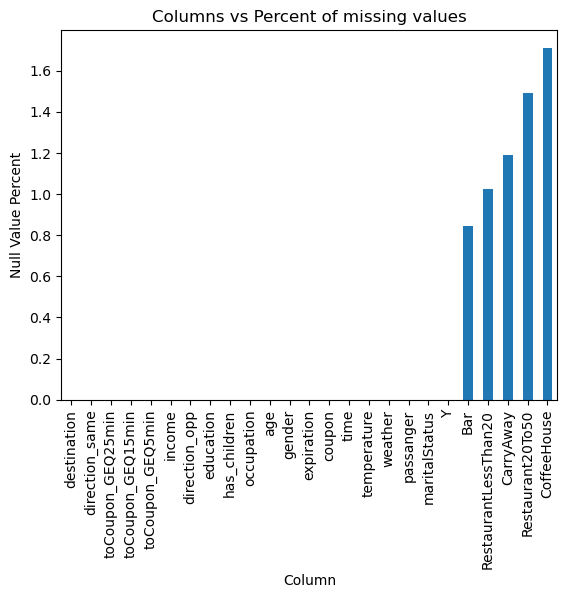

In [15]:
missing_data_summary_pct = data.isna().sum() / data.shape[0] * 100
print(missing_data_summary_pct)
missing_data_summary_pct.sort_values().plot(
    kind='bar',
    xlabel = 'Column',
    ylabel = 'Null Value Percent',
    title='Columns vs Percent of missing values')

OBSERVATION: 5 columns have null values which is less than 2% of data for resepective columns

In [17]:
# Since these columns have relatively very small number of null values
# cleanup by dropping the records with null values should be sufficient.
data_filtered = data.dropna()

print('Shape of data before cleanup ==>', data.shape)
print('Shape of data after cleanup ==>', data_filtered.shape)

Shape of data before cleanup ==> (12684, 25)
Shape of data after cleanup ==> (12079, 25)


4. What proportion of the total observations chose to accept the coupon?



In [19]:
total_records = data_filtered['Y'].count()
accepted_records = data_filtered['Y'].value_counts().get(1)
percent_accepeted = accepted_records / total_records
percent_accepeted
# print(percent_accepeted)
# print(data_filtered['Y'].value_counts())

0.5693352098683666

OBSERVATION: About 57% of coupons were accepeted.

5. Use a bar plot to visualize the `coupon` column.

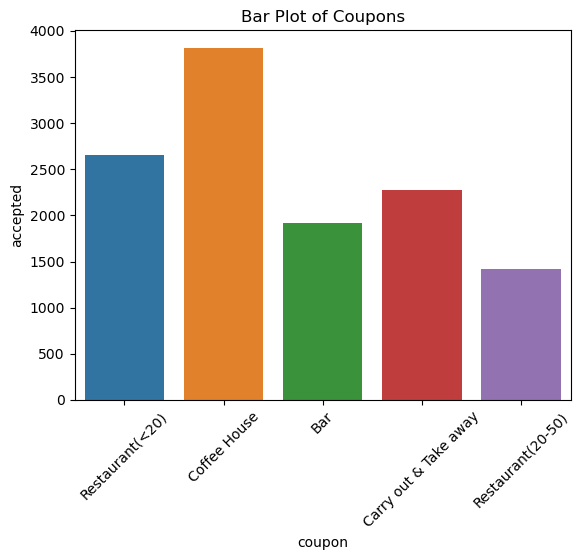

In [22]:

# data_filtered.plot(x='coupon', hue='Y', kind='bar')
sns.countplot(data=data_filtered, x='coupon', hue='coupon')

# Adding labels and title
plt.xlabel('coupon')
plt.ylabel('accepted')
plt.title('Bar Plot of Coupons')
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

6. Use a histogram to visualize the temperature column.

In [24]:
data_filtered['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

(array([20., 30., 40., 50., 60., 70., 80., 90.]),
 [Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80'),
  Text(90.0, 0, '90')])

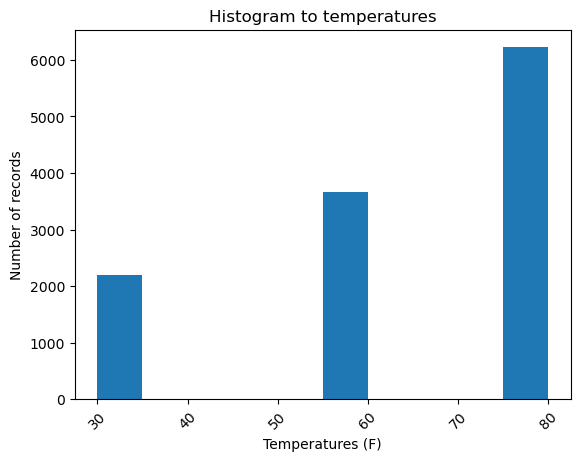

In [25]:
plt.hist(data_filtered['temperature'])
plt.xlabel('Temperatures (F)')
plt.ylabel('Number of records')
plt.title('Histogram to temperatures')
plt.xticks(rotation=45)

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [27]:
# analyze
data['coupon'].value_counts()
data.shape

# drop null values only for Bar column
data_coupon_bar=data[data['coupon']=='Bar'].dropna(subset=['Bar'])

#summary
data_coupon_bar.info()
data_coupon_bar

<class 'pandas.core.frame.DataFrame'>
Index: 1996 entries, 9 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1996 non-null   object
 1   passanger             1996 non-null   object
 2   weather               1996 non-null   object
 3   temperature           1996 non-null   int64 
 4   time                  1996 non-null   object
 5   coupon                1996 non-null   object
 6   expiration            1996 non-null   object
 7   gender                1996 non-null   object
 8   age                   1996 non-null   object
 9   maritalStatus         1996 non-null   object
 10  has_children          1996 non-null   int64 
 11  education             1996 non-null   object
 12  occupation            1996 non-null   object
 13  income                1996 non-null   object
 14  Bar                   1996 non-null   object
 15  CoffeeHouse           1966 non-null   obje

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [29]:
accepeted_bar_coupons = data_coupon_bar['Y'].value_counts().get(1)
total_bar_coupons = data_coupon_bar['Y'].count()

# print(accepeted_bar_coupons)
# print(total_bar_coupons)
proportion_accepted = accepeted_bar_coupons / total_bar_coupons
print(proportion_accepted)

0.4103206412825651


OBSERVATION: Bar coupons have an acceptance rate of about <b>41%</b> which is lower than the global acceptance rate of <b>~57%</b>

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [32]:
# study Bar column
# data_coupon_bar['Bar'].value_counts()

# Get subset of dataset with only Bar and Y columns
data_coupon_bar_q3 = data_coupon_bar

# calculate acceptance rate for those who went to a bar 3 or fewer times a month 
labels_3_or_less = ['never', 'less1', '1~3']
data_coupon_bar_q3.loc[data_coupon_bar_q3['Bar'].isin(labels_3_or_less), 'frequency'] = '3_or_less'

# calculate acceptance rate for those who went to a bar more than 3 times a month 
labels_more = ['4~8', 'gt8']
data_coupon_bar_q3.loc[data_coupon_bar_q3['Bar'].isin(labels_more),'frequency'] = 'more_than_3'

# calculate acceptance rate based on frequency of visits
df_q3 = data_coupon_bar_q3.groupby(by='frequency').agg(
    total_count = ('frequency', 'count'),
    accepted_count = ('Y', lambda x: (x == 1).sum())
)

df_q3['acceptance_rate'] = df_q3['accepted_count'] / df_q3['total_count']

df_q3 = df_q3.reset_index()
df_q3

,frequency,total_count,accepted_count,acceptance_rate
0,3_or_less,1797,666,0.370618
1,more_than_3,199,153,0.768844


Text(0, 0.5, 'Coupon acceptance rate')

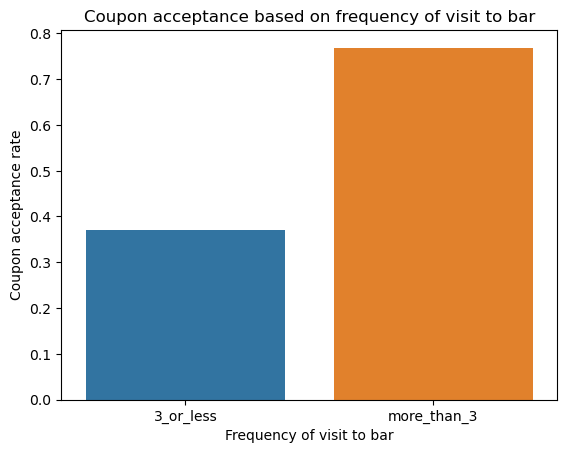

In [33]:
plot = sns.barplot(data=df_q3, x='frequency', y='acceptance_rate', hue='frequency')
plot.set_title('Coupon acceptance based on frequency of visit to bar')
plot.set_xlabel('Frequency of visit to bar')
plot.set_ylabel('Coupon acceptance rate')

OBSERVATION: Acceptance rate is higher at ~<b>77%</b> among people who visit the bar more than 3 times a month compared to ~<b>37%</b> for people who visit the bar less frequently.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [36]:
# study data in age column
# data_coupon_bar['age'].info()
# data_coupon_bar['age'].value_counts()

# Get subset of dataset with only Bar and Y columns
data_coupon_bar_q4 = data_coupon_bar

# cleanup the data for age='50plus' and age='below21'
data_coupon_bar_q4.loc[data_coupon_bar_q4['age']=='50plus', 'age'] = 50
data_coupon_bar_q4.loc[data_coupon_bar_q4['age']=='below21', 'age'] = 20
data_coupon_bar_q4['age'] = pd.to_numeric(data_coupon_bar_q4['age'], errors='coerce')


labels_more_than_once = ['1~3', '4~8', 'gt8']
# set default value as others
data_coupon_bar_q4['age_25plus_visits_1plus'] = 'No'
# calculate acceptance rate for those who visit the bar more than once and older than 25  
data_coupon_bar_q4.loc[(data_coupon_bar_q4['Bar'].isin(labels_more_than_once)) & (data_coupon_bar_q4['age'] > 25), 'age_25plus_visits_1plus'] = 'Yes'

# calculate acceptance rate based on frequency of visits
df_q4 = data_coupon_bar_q4.groupby(by='age_25plus_visits_1plus').agg(
    total_count = ('age_25plus_visits_1plus', 'count'),
    accepted_count = ('Y', lambda x: (x == 1).sum())
)

df_q4['acceptance_rate'] = df_q4['accepted_count'] / df_q4['total_count']

df_q4 = df_q4.reset_index()
df_q4

,age_25plus_visits_1plus,total_count,accepted_count,acceptance_rate
0,No,1576,527,0.334391
1,Yes,420,292,0.695238


Text(0, 0.5, 'Coupon acceptance rate')

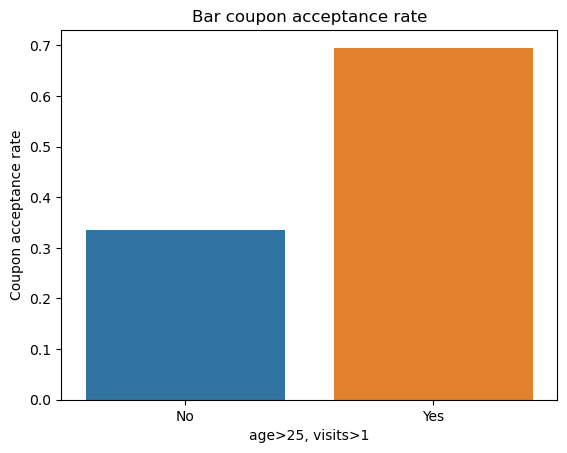

In [37]:
plot = sns.barplot(data=df_q4, x='age_25plus_visits_1plus', y='acceptance_rate', hue='age_25plus_visits_1plus')
plot.set_title('Bar coupon acceptance rate')
plot.set_xlabel('age>25, visits>1')
plot.set_ylabel('Coupon acceptance rate')

OBSERVATION: The older drivers who visit a bar more frequently are likely to accept the Bar coupons. For drivers older than 25 years who visited a bar more than once a month had a <b>69.5%</b> acceptance rate compared to others who had the accpetance rate of <b>33.4%</b>.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [40]:
# understand the data for different columns
# data_coupon_bar['occupation'].info()
# data_coupon_bar['occupation'].value_counts()
# data_coupon_bar['passanger'].value_counts()

# filter criteria
labels_more_than_once = ['1~3', '4~8', 'gt8']
occupation_farming_fishing_forestry = 'Farming Fishing & Forestry'
passanger_kids = 'Kid(s)'

# Get subset of dataset with only Bar and Y columns
data_coupon_bar_q5 = data_coupon_bar

# set default value as others
data_coupon_bar_q5['q5_criteria'] = 'No'
# calculate acceptance rate for those who visit the bar more than once and older than 25  
data_coupon_bar_q5.loc[
    (data_coupon_bar_q5['Bar'].isin(labels_more_than_once)) & 
    (data_coupon_bar_q5['occupation'] != occupation_farming_fishing_forestry) &
    (data_coupon_bar_q5['passanger'] != passanger_kids), 
    'q5_criteria'
] = 'Yes'

# calculate acceptance rate based on frequency of visits
df_q5 = data_coupon_bar_q5.groupby(by='q5_criteria').agg(
    total_count = ('q5_criteria', 'count'),
    accepted_count = ('Y', lambda x: (x == 1).sum())
)

df_q5['acceptance_rate'] = df_q5['accepted_count'] / df_q5['total_count']

df_q5 = df_q5.reset_index()
df_q5


,q5_criteria,total_count,accepted_count,acceptance_rate
0,No,1445,426,0.294810
1,Yes,551,393,0.713249


Text(0, 0.5, 'Coupon acceptance rate')

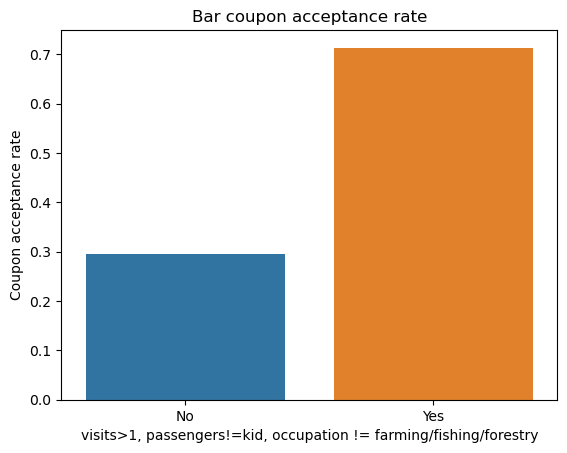

In [41]:
plot = sns.barplot(data=df_q5, x='q5_criteria', y='acceptance_rate', hue='q5_criteria')
plot.set_title('Bar coupon acceptance rate')
plot.set_xlabel('visits>1, passengers!=kid, occupation != farming/fishing/forestry')
plot.set_ylabel('Coupon acceptance rate')

OBSERVATION:
Drivers working in industries other than farming/fishing/forestry who visited a bar more than once, with no kids as passengers were more likely to accept the bar coupons. Acceptance rate was found to be <b>71.3%</b> for these drivers compared to others who had an acceptance rate of <b>29.5%</b> 

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [44]:
# filter criteria
labels_more_than_once = ['1~3', '4~8', 'gt8']
occupation_farming_fishing_forestry = 'Farming Fishing & Forestry'
passanger_kids = 'Kid(s)'
maritalStatus = 'Widowed'
labels_4plus_visits = ['4~8', 'gt8']
labels_income = ['$25000 - $37499','$12500 - $24999','$37500 - $49999','Less than $12500']

# Get subset of dataset with only Bar and Y columns
data_coupon_bar_q6 = data_coupon_bar

# cleanup the data for age='50plus' and age='below21'
data_coupon_bar_q6.loc[data_coupon_bar_q6['age']=='50plus', 'age'] = 50
data_coupon_bar_q6.loc[data_coupon_bar_q6['age']=='below21', 'age'] = 20
data_coupon_bar_q6['age'] = pd.to_numeric(data_coupon_bar_q6['age'], errors='coerce')

# set default value as others
data_coupon_bar_q6['q6_criteria'] = 'No'
# calculate acceptance rate for those who visit the bar more than once and older than 25  
data_coupon_bar_q6.loc[
    (
        (data_coupon_bar_q6['Bar'].isin(labels_more_than_once)) &
        (data_coupon_bar_q6['passanger'] != passanger_kids) & 
        (data_coupon_bar_q6['maritalStatus'] != maritalStatus)
    ) | (
        (data_coupon_bar_q6['Bar'].isin(labels_more_than_once)) &
        (data_coupon_bar_q6['age'] < 30) 
    ) | (
        (data_coupon_bar_q6['RestaurantLessThan20'].isin(labels_4plus_visits)) &
        (data_coupon_bar_q6['income'].isin(labels_income))
    )
, 
    'q6_criteria'
] = 'Yes'

# calculate acceptance rate based on frequency of visits
df_q6 = data_coupon_bar_q6.groupby(by='q6_criteria').agg(
    total_count = ('q6_criteria', 'count'),
    accepted_count = ('Y', lambda x: (x == 1).sum())
)

df_q6['acceptance_rate'] = df_q6['accepted_count'] / df_q6['total_count']

df_q6 = df_q6.reset_index()
df_q6

,q6_criteria,total_count,accepted_count,acceptance_rate
0,No,1225,363,0.296327
1,Yes,771,456,0.591440


Text(0, 0.5, 'Coupon acceptance rate')

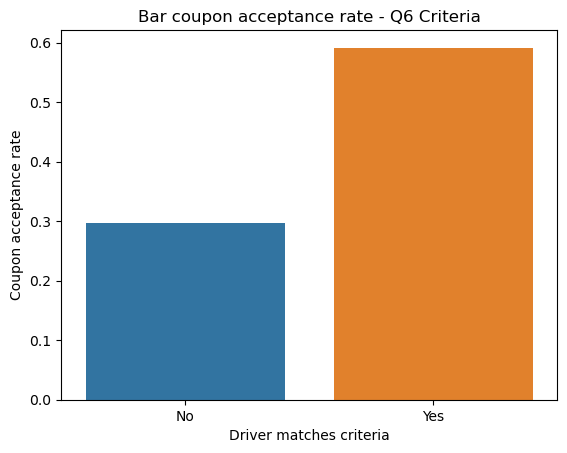

In [45]:
plot = sns.barplot(data=df_q6, x='q6_criteria', y='acceptance_rate', hue='q6_criteria')
plot.set_title('Bar coupon acceptance rate - Q6 Criteria')
plot.set_xlabel('Driver matches criteria')
plot.set_ylabel('Coupon acceptance rate')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

The drivers are more likely to accept the bar coupons if
* they visit a bar more frequently 
* do not have kids as passengers 
* Older than 30

While the above patterns are quite evident from analysis, it is hard to predict if the occupation (or marital status) is correlated to acceptance rate. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Let's analyze the acceptance rate for different coupons.

In [50]:
# data_filtered.info()
df_coupons = data_filtered.groupby(by='coupon').agg(
    total_count = ('coupon', 'count'),
    accepted_count = ('Y', lambda x: (x == 1).sum())
)
df_coupons['acceptance_rate'] = df_coupons['accepted_count'] / df_coupons ['total_count']
df_coupons=df_coupons.reset_index()
df_coupons


,coupon,total_count,accepted_count,acceptance_rate
0,Bar,1913,788,0.411918
1,Carry out & Take away,2280,1682,0.737719
2,Coffee House,3816,1894,0.496331
3,Restaurant(20-50),1417,632,0.446013
4,Restaurant(<20),2653,1881,0.709009


/var/folders/5b/cbj9dmzs4bs3z0sl2___r2240000gn/T/ipykernel_43070/4031060170.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'Bar'),
 Text(1, 0, 'Carry out & Take away'),
 Text(2, 0, 'Coffee House'),
 Text(3, 0, 'Restaurant(20-50)'),
 Text(4, 0, 'Restaurant(<20)')]

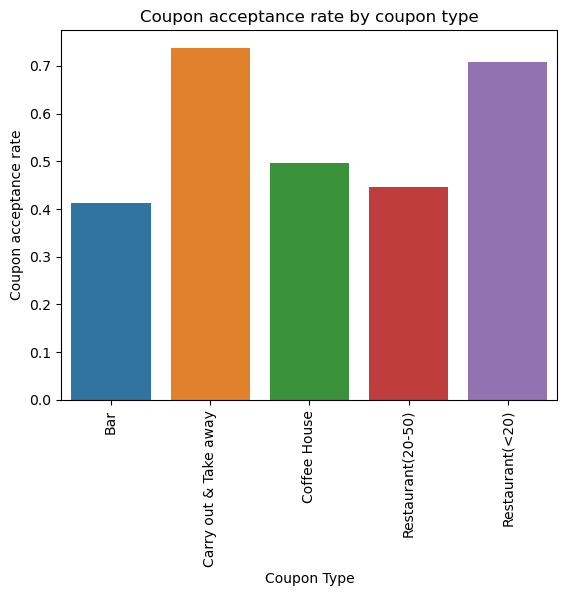

In [51]:
plot = sns.barplot(data=df_coupons, x='coupon', y='acceptance_rate', hue='coupon')
plot.set_title('Coupon acceptance rate by coupon type')
plot.set_xlabel('Coupon Type')
plot.set_ylabel('Coupon acceptance rate')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

Let's see how driver's income affects the acceptance rate for `Carry out & Take away` coupons which has the highest acceptance rates of ~74%

In [53]:
# data for 'Carry out & Take away' coupons
coupon_category=r"Carry out & Take away"
coupons_carry_out = data.query('coupon == @coupon_category').dropna(subset=['CarryAway'])

In [54]:
carry_away_once_or_more = ['1~3', '4~8', 'gt8']
df_carry_out_once_or_more = coupons_carry_out.loc[coupons_carry_out['CarryAway'].isin(carry_away_once_or_more)]

# coupon_category_out.info()
# df_carry_out_once_by_income
df_carry_out_once_by_income = df_carry_out_once_or_more.groupby(by='income').agg(
    total_count = ('coupon', 'count'),
    accepted_count = ('Y', lambda x: (x == 1).sum())
)
df_carry_out_once_by_income['acceptance_rate'] = df_carry_out_once_by_income['accepted_count'] / df_carry_out_once_by_income ['total_count']
df_carry_out_once_by_income=df_carry_out_once_by_income.reset_index()
df_carry_out_once_by_income

,income,total_count,accepted_count,acceptance_rate
0,$100000 or More,288,202,0.701389
1,$12500 - $24999,289,220,0.761246
2,$25000 - $37499,323,247,0.764706
3,$37500 - $49999,281,203,0.722420
4,$50000 - $62499,228,187,0.820175
5,$62500 - $74999,143,102,0.713287
6,$75000 - $87499,149,100,0.671141
7,$87500 - $99999,119,92,0.773109
8,Less than $12500,166,124,0.746988


/var/folders/5b/cbj9dmzs4bs3z0sl2___r2240000gn/T/ipykernel_43070/2937274322.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, '$100000 or More'),
 Text(1, 0, '$12500 - $24999'),
 Text(2, 0, '$25000 - $37499'),
 Text(3, 0, '$37500 - $49999'),
 Text(4, 0, '$50000 - $62499'),
 Text(5, 0, '$62500 - $74999'),
 Text(6, 0, '$75000 - $87499'),
 Text(7, 0, '$87500 - $99999'),
 Text(8, 0, 'Less than $12500')]

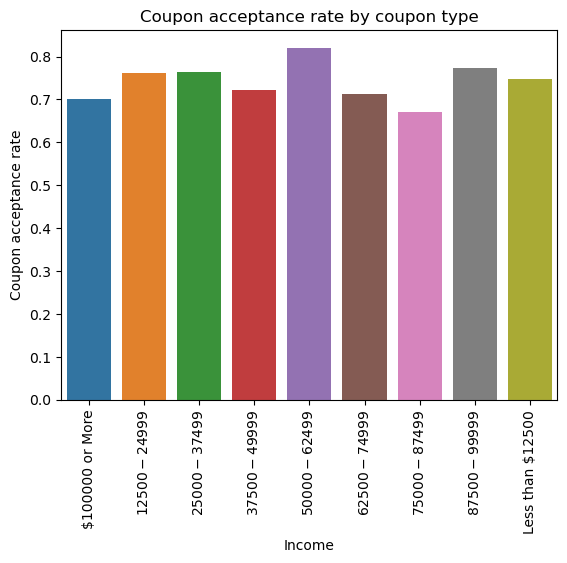

In [55]:
plot = sns.barplot(data=df_carry_out_once_by_income, x='income', y='acceptance_rate', hue='income')
plot.set_title('Coupon acceptance rate by coupon type')
plot.set_xlabel('Income')
plot.set_ylabel('Coupon acceptance rate')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

OBSERVATION:
The coupon acceptance-rate is uniform across different income groups. Ranges between 67% - 82%

Let's check if the pattern differs for drivers who CarryAway more than thrice a month 

In [58]:
carry_away_more_than_thrice = ['1~3', '4~8', 'gt8']
df_carry_out_more_than_thrice = coupons_carry_out.loc[coupons_carry_out['CarryAway'].isin(carry_away_more_than_thrice)]

# coupon_category_out.info()
# df_carry_out_once_by_income
df_carry_out_thrice_by_income = df_carry_out_more_than_thrice.groupby(by='income').agg(
    total_count = ('coupon', 'count'),
    accepted_count = ('Y', lambda x: (x == 1).sum())
)
df_carry_out_thrice_by_income['acceptance_rate'] = df_carry_out_thrice_by_income['accepted_count'] / df_carry_out_thrice_by_income ['total_count']
df_carry_out_thrice_by_income=df_carry_out_thrice_by_income.reset_index()
df_carry_out_thrice_by_income

,income,total_count,accepted_count,acceptance_rate
0,$100000 or More,288,202,0.701389
1,$12500 - $24999,289,220,0.761246
2,$25000 - $37499,323,247,0.764706
3,$37500 - $49999,281,203,0.722420
4,$50000 - $62499,228,187,0.820175
5,$62500 - $74999,143,102,0.713287
6,$75000 - $87499,149,100,0.671141
7,$87500 - $99999,119,92,0.773109
8,Less than $12500,166,124,0.746988


/var/folders/5b/cbj9dmzs4bs3z0sl2___r2240000gn/T/ipykernel_43070/1048048127.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, '$100000 or More'),
 Text(1, 0, '$12500 - $24999'),
 Text(2, 0, '$25000 - $37499'),
 Text(3, 0, '$37500 - $49999'),
 Text(4, 0, '$50000 - $62499'),
 Text(5, 0, '$62500 - $74999'),
 Text(6, 0, '$75000 - $87499'),
 Text(7, 0, '$87500 - $99999'),
 Text(8, 0, 'Less than $12500')]

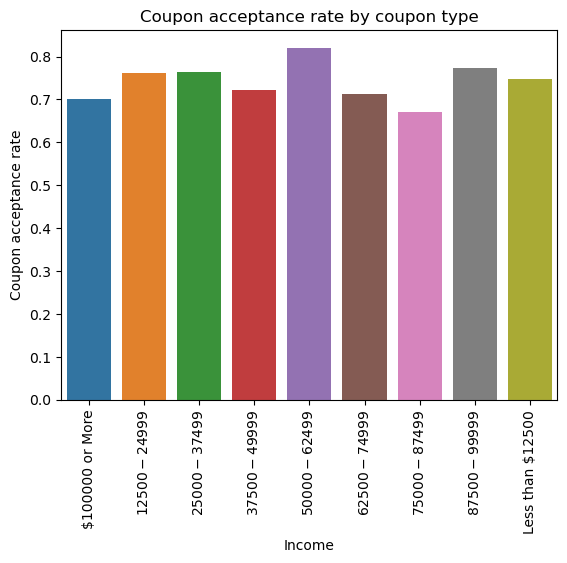

In [59]:
plot = sns.barplot(data=df_carry_out_thrice_by_income, x='income', y='acceptance_rate', hue='income')
plot.set_title('Coupon acceptance rate by coupon type')
plot.set_xlabel('Income')
plot.set_ylabel('Coupon acceptance rate')
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

OBSERVATION:
the 'Carry out & Take away' coupons are popular across different income groups and uniformly distributed independent of the frequncy of the CarryAway

Let's see how the direction affects the carry away patterns and acceptance rate

In [132]:
carry_away_once_or_more = ['1~3', '4~8', 'gt8']
df_carry_out_once_or_more = coupons_carry_out.loc[coupons_carry_out['CarryAway'].isin(carry_away_once_or_more)]

# coupon_category_out.info()
# df_carry_out_once_by_income
df_carry_out_once_by_direction = df_carry_out_once_or_more.groupby(by='direction_same').agg(
    total_count = ('coupon', 'count'),
    accepted_count = ('Y', lambda x: (x == 1).sum())
)
df_carry_out_once_by_direction['acceptance_rate'] = df_carry_out_once_by_direction['accepted_count'] / df_carry_out_once_by_direction ['total_count']
df_carry_out_once_by_direction=df_carry_out_once_by_direction.reset_index()
df_carry_out_once_by_direction

,direction_same,total_count,accepted_count,acceptance_rate
0,0,1319,1003,0.760425
1,1,667,474,0.710645


OBSERVATION:

The data shows some counter-intuitive patterns:
* the acceptance-rate is higher at 76% when driving direction is opposite 
* the acceptance-rate seems to be lower as 71% when driving direction is same.